# Plot Breakdown of CASA and PL Timings

The goal here is to plot the breakdown of the PL timings into individual CASA tasks

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import pandas as pd
import pickle
from importlib import reload
import parse_logs

## read in data files

In [2]:
wsu_cycle7 = Table.read('data/wsu_datarates_mit_per_mous_cycle7_20230124.ecsv')
wsu_cycle8 = Table.read('data/wsu_datarates_mit_per_mous_cycle8_20230124.ecsv')

In [3]:
wsu_cycle7.columns

<TableColumns names=('mous','proposal_id','schedblock_name','array','nant_typical','nant_array','nant_all','band','ntarget','s_fov','s_resolution','mosaic','imsize','pb','cell','blc_npol','blc_nspw','blc_specwidth','blc_freq','blc_velres','blc_nchan_agg','blc_nchan_max','blc_bandwidth_max','blc_bandwidth_agg','wsu_freq','wsu_npol','wsu_bandwidth_early','wsu_bandwidth_later_2x','wsu_bandwidth_later_4x','wsu_bandwidth_spw','wsu_nspw_early','wsu_nspw_later_2x','wsu_nspw_later_4x','wsu_specwidth_finest','wsu_chanavg_finest','wsu_velres_finest','wsu_specwidth_stepped','wsu_chanavg_stepped','wsu_velres_stepped','wsu_specwidth_stepped2','wsu_chanavg_stepped2','wsu_velres_stepped2','wsu_tint','wsu_nchan_spw_finest','wsu_nchan_spw_stepped','wsu_nchan_spw_stepped2','wsu_frac_bw_early','wsu_frac_bw_later_2x','wsu_frac_bw_later_4x','wsu_frac_bw_spw','nbase_typical','nbase_array','nbase_all','L80','blc_tint','blc_ntunings','bp_time','flux_time','phase_time','pol_time','check_time','target_time_tot'

In [4]:
wsu_cycle7 = Table(wsu_cycle7,masked=True)

In [5]:
result_pkl = pickle.load(open('data/cycle7_pl_casa_timings.pkl','rb'))

In [6]:
rpd = pd.DataFrame(result_pkl).transpose()


In [7]:
mycols = ['importasdm','flagdata','listobs','plotms','clearstat',
          'flagcmd','gencal','plotbandpass','wvrgcal','gaincal',
          'bandpass','setjy','flagmanager','applycal','fluxscale',
          'tclean','exportfits','mstransform','imhead','immoments',
          'imstat','imsubimage','makemask','immath','uvcontfit','visstat',
         'pipetime','casatasks','casatools','imager.selectvis','imager.advise',
         'imager.apparentsens','ia.getprofile']

mycols_dtype = {}
for col in mycols:
    mycols_dtype[col]  = 'float'

In [8]:
rpd = rpd.astype(dtype=mycols_dtype)

In [9]:
casa_cycle7 = Table.from_pandas(rpd)

In [10]:
# make sure masks are there
casa_cycle7 = Table(casa_cycle7,masked=True)
casa_cycle7.filled(np.nan)

casaversion,pipeStartTime,recipe,casatasks,importasdm,flagdata,listobs,plotms,clearstat,flagcmd,gencal,plotbandpass,wvrgcal,gaincal,bandpass,setjy,flagmanager,applycal,plotms_mpi,fluxscale,casatools,imager.selectvis,imager.advise,imager.apparentsens,tclean_mpi,tclean,pipeEndTime,exportfits,mstransform,imhead,immoments,imstat,imsubimage,makemask,ia.getprofile,immath,uvcontfit,pipetime,visstat
str8,Time,str22,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,float64,float64,float64,float64,object,float64,Time,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
6.2.1.7,2021-10-27T22:02:13.000,hifa_calimage_renorm,87558.94373000001,948.228747,5264.079766000001,27.824735,7054.618035000006,0.000181,5.995071,9.576253,1063.474564,196.749794,6610.711172000001,750.64648,1334.875963,831.8174760000002,3680.192162,5436.425155,2.893925,2648.062957999999,171.24761900000004,839.528738,393.28660099999996,3721.0447289999997,41945.734168,2021-10-30T07:25:17.000,0.637024,162.72465,0.9670449999999995,17145.893182000003,6507.672968,5.047764999999999,45.494020000000006,1244.0,9.558468,3111.0,206584.0,nan
5.6.1-8,2019-12-09T17:34:28.000,hifa_calimage,8394.0,0.0,3197.0,13.0,1401.0,nan,3.0,8.0,814.0,103.0,526.0,100.0,350.0,378.0,340.0,491.0,2.0,173.07062800000003,82.78582,57.896499000000006,28.388308999999992,68.0,1221.0,2019-12-09T20:47:13.000,1.0,23.0,10.0,11.0,9.0,3.0,21.0,4.0,nan,419.0,11565.0,nan
6.1.1.15,2021-07-14T01:30:41.000,hifa_calimage,164296.5917799994,0.002248,27457.244974000005,127.952181,8257.419685999997,nan,77.114316,96.655397,7055.933929000001,1541.538869,7964.262886999999,964.3535069999998,4449.340258000001,5000.676398999999,7017.016793,5558.478096000002,18.916549,8076.0202960000115,5973.082255000021,348.27908899999983,64.65895200000003,3772.631502,83233.47163900004,2021-07-17T10:51:28.000,3.803078999999999,620.428495,126.9821230000001,8130.446726000005,10911.827190000027,38.13078699999997,358.3015419999999,1690.0,67.88180399999995,108.0,292847.0,nan
6.2.1.7,2021-10-05T08:29:26.000,hifa_calimage,57144.20080200007,606.053363,5221.306346999999,12.803783999999998,1137.921575,0.000659,5.813961999999999,19.832013,1029.852365,nan,475.62916,98.08901099999999,509.9944429999999,422.715276,329.26279400000004,571.6189229999998,3.9085870000000003,123.05886600000004,48.61842499999996,41.295545,14.144895999999997,352.249085,47551.855562000004,2021-10-06T03:25:52.000,2.9238280000000003,74.099001,4.5976329999999965,185.17970700000012,117.65667499999999,23.912356000000003,165.98378200000002,19.0,37.676927000000006,31.0,68186.0,nan
5.6.1-8,2019-12-24T15:46:03.000,hifa_calimage,4004.0,0.0,676.0,2.0,281.0,nan,0.0,1.0,219.0,nan,114.0,18.0,92.0,51.0,50.0,125.0,1.0,26.67289100000001,12.204244000000006,7.306537999999999,4.162109000000001,58.0,2617.0,2019-12-24T17:18:49.000,1.0,3.0,7.0,13.0,4.0,1.0,10.0,3.0,nan,26.0,5566.0,nan
5.6.1-8,2020-04-03T08:55:25.000,hifa_calimage,10407.0,0.0,4406.0,18.0,1575.0,nan,3.0,11.0,1073.0,64.0,506.0,84.0,441.0,512.0,465.0,640.0,1.0,248.97644000000005,116.150633,86.254441,43.571366000000005,48.0,1174.0,2020-04-03T12:43:42.000,0.0,34.0,10.0,7.0,5.0,3.0,13.0,3.0,nan,690.0,13697.0,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5.6.1-8,2019-12-15T01:45:59.000,hifa_calimage,50459.0,0.0,2942.0,10.0,1648.0,nan,4.0,7.0,1115.0,33.0,2018.0,470.0,614.0,329.0,1024.0,1046.0,1.0,636.936270999999,133.2518109999999,149.99357499999996,41.69088500000001,387.0,39800.0,2019-12-15T22:14:47.000,0.0,60.0,143.0,620.0,482.0,72.0,360.0,312.0,nan,140.0,73728.0,nan
6.1.1.15,2021-07-23T14:39:46.000,hifa_calimage,413524.5847949997,5936.786650999999,19989.731366,116.0761,31149.616618000044,0.00046,22.610118,47.20556800000001,4700.645045,755.068947,50704.72602899999,5994.478448000001,10023.414660999999,3671.51313300000

In [11]:
casa_cycle7.columns

<TableColumns names=('casaversion','pipeStartTime','recipe','casatasks','importasdm','flagdata','listobs','plotms','clearstat','flagcmd','gencal','plotbandpass','wvrgcal','gaincal','bandpass','setjy','flagmanager','applycal','plotms_mpi','fluxscale','casatools','imager.selectvis','imager.advise','imager.apparentsens','tclean_mpi','tclean','pipeEndTime','exportfits','mstransform','imhead','immoments','imstat','imsubimage','makemask','ia.getprofile','immath','uvcontfit','pipetime','visstat')>

In [12]:
casa_cycle7

casaversion,pipeStartTime,recipe,casatasks,importasdm,flagdata,listobs,plotms,clearstat,flagcmd,gencal,plotbandpass,wvrgcal,gaincal,bandpass,setjy,flagmanager,applycal,plotms_mpi,fluxscale,casatools,imager.selectvis,imager.advise,imager.apparentsens,tclean_mpi,tclean,pipeEndTime,exportfits,mstransform,imhead,immoments,imstat,imsubimage,makemask,ia.getprofile,immath,uvcontfit,pipetime,visstat
str8,Time,str22,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,float64,float64,float64,float64,object,float64,Time,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
6.2.1.7,2021-10-27T22:02:13.000,hifa_calimage_renorm,87558.94373000001,948.228747,5264.079766000001,27.824735,7054.618035000006,0.000181,5.995071,9.576253,1063.474564,196.749794,6610.711172000001,750.64648,1334.875963,831.8174760000002,3680.192162,5436.425155,2.893925,2648.062957999999,171.24761900000004,839.528738,393.28660099999996,3721.0447289999997,41945.734168,2021-10-30T07:25:17.000,0.637024,162.72465,0.9670449999999995,17145.893182000003,6507.672968,5.047764999999999,45.494020000000006,1244.0,9.558468,3111.0,206584.0,--
5.6.1-8,2019-12-09T17:34:28.000,hifa_calimage,8394.0,0.0,3197.0,13.0,1401.0,--,3.0,8.0,814.0,103.0,526.0,100.0,350.0,378.0,340.0,491.0,2.0,173.07062800000003,82.78582,57.896499000000006,28.388308999999992,68.0,1221.0,2019-12-09T20:47:13.000,1.0,23.0,10.0,11.0,9.0,3.0,21.0,4.0,--,419.0,11565.0,--
6.1.1.15,2021-07-14T01:30:41.000,hifa_calimage,164296.5917799994,0.002248,27457.244974000005,127.952181,8257.419685999997,--,77.114316,96.655397,7055.933929000001,1541.538869,7964.262886999999,964.3535069999998,4449.340258000001,5000.676398999999,7017.016793,5558.478096000002,18.916549,8076.0202960000115,5973.082255000021,348.27908899999983,64.65895200000003,3772.631502,83233.47163900004,2021-07-17T10:51:28.000,3.803078999999999,620.428495,126.9821230000001,8130.446726000005,10911.827190000027,38.13078699999997,358.3015419999999,1690.0,67.88180399999995,108.0,292847.0,--
6.2.1.7,2021-10-05T08:29:26.000,hifa_calimage,57144.20080200007,606.053363,5221.306346999999,12.803783999999998,1137.921575,0.000659,5.813961999999999,19.832013,1029.852365,--,475.62916,98.08901099999999,509.9944429999999,422.715276,329.26279400000004,571.6189229999998,3.9085870000000003,123.05886600000004,48.61842499999996,41.295545,14.144895999999997,352.249085,47551.855562000004,2021-10-06T03:25:52.000,2.9238280000000003,74.099001,4.5976329999999965,185.17970700000012,117.65667499999999,23.912356000000003,165.98378200000002,19.0,37.676927000000006,31.0,68186.0,--
5.6.1-8,2019-12-24T15:46:03.000,hifa_calimage,4004.0,0.0,676.0,2.0,281.0,--,0.0,1.0,219.0,--,114.0,18.0,92.0,51.0,50.0,125.0,1.0,26.67289100000001,12.204244000000006,7.306537999999999,4.162109000000001,58.0,2617.0,2019-12-24T17:18:49.000,1.0,3.0,7.0,13.0,4.0,1.0,10.0,3.0,--,26.0,5566.0,--
5.6.1-8,2020-04-03T08:55:25.000,hifa_calimage,10407.0,0.0,4406.0,18.0,1575.0,--,3.0,11.0,1073.0,64.0,506.0,84.0,441.0,512.0,465.0,640.0,1.0,248.97644000000005,116.150633,86.254441,43.571366000000005,48.0,1174.0,2020-04-03T12:43:42.000,0.0,34.0,10.0,7.0,5.0,3.0,13.0,3.0,--,690.0,13697.0,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5.6.1-8,2019-12-15T01:45:59.000,hifa_calimage,50459.0,0.0,2942.0,10.0,1648.0,--,4.0,7.0,1115.0,33.0,2018.0,470.0,614.0,329.0,1024.0,1046.0,1.0,636.936270999999,133.2518109999999,149.99357499999996,41.69088500000001,387.0,39800.0,2019-12-15T22:14:47.000,0.0,60.0,143.0,620.0,482.0,72.0,360.0,312.0,--,140.0,73728.0,--
6.1.1.15,2021-07-23T14:39:46.000,hifa_calimage,413524.5847949997,5936.786650999999,19989.731366,116.0761,31149.616618000044,0.00046,22.610118,47.20556800000001,4700.645045,755.068947,50704.72602899999,5994.478448000001,10023.414660999999,3671.5131330000004,21709.333042,26

In [13]:
casa_cycle7['importasdm']

948.228747
0.0
0.002248
606.053363
0.0
0.0
81.808554
3699.015142
72.280127
...
311.403563


## Plot Fraction of Calibration and Imaging Time

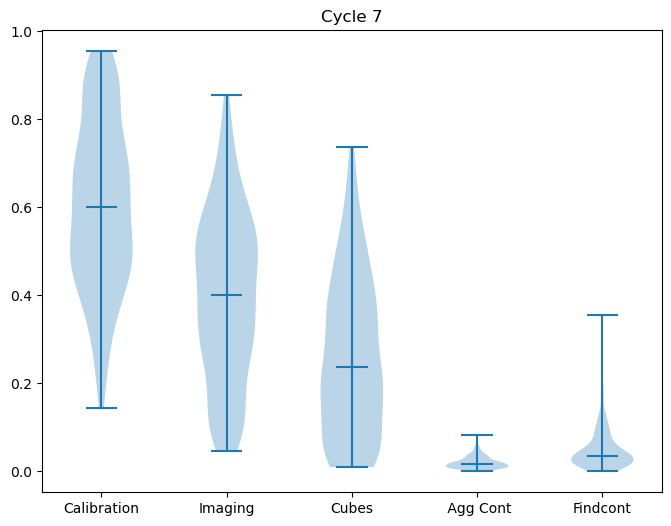

In [22]:
reload(parse_logs)
parse_logs.plot_cal_img_time(wsu_cycle7,plot_title='Cycle 7')

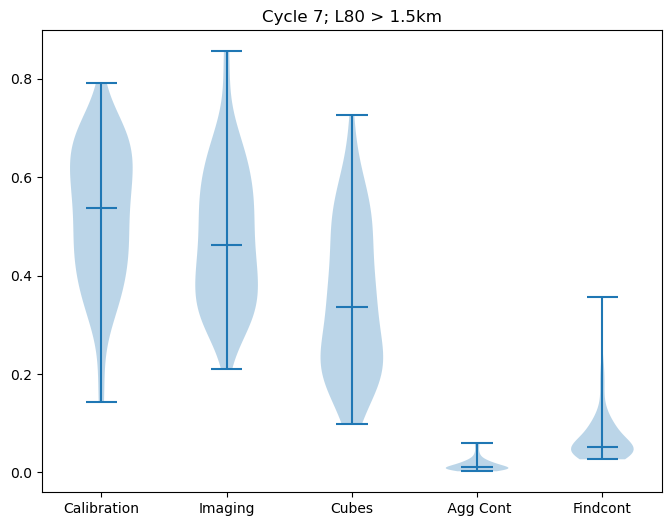

In [31]:
idx = wsu_cycle7['L80'] > 1500
parse_logs.plot_cal_img_time(wsu_cycle7[idx],plot_title='Cycle 7; L80 > 1.5km')

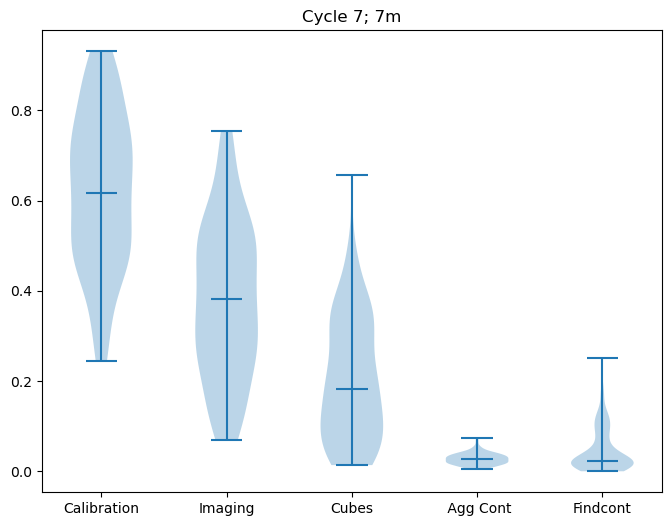

In [28]:
idx = wsu_cycle7['array'] == '7m'
parse_logs.plot_cal_img_time(wsu_cycle7[idx],plot_title='Cycle 7; 7m')

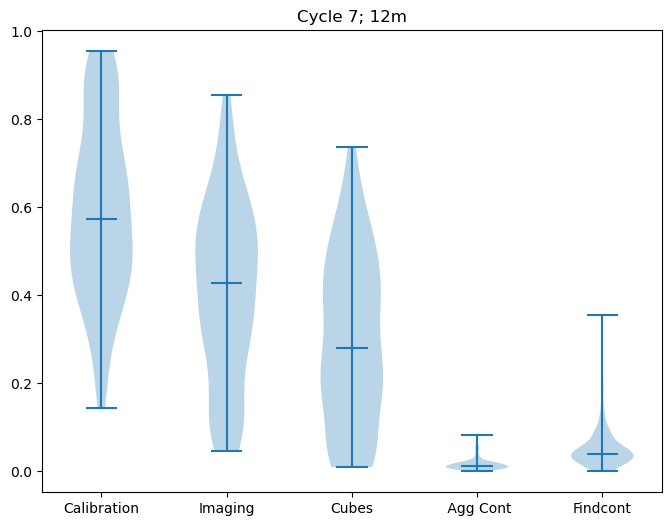

In [29]:
idx = wsu_cycle7['array'] == '12m'
parse_logs.plot_cal_img_time(wsu_cycle7[idx],plot_title='Cycle 7; 12m')

## Plot Fraction of CASA  time, CASA task, CASA tool

In [21]:
import parse_logs

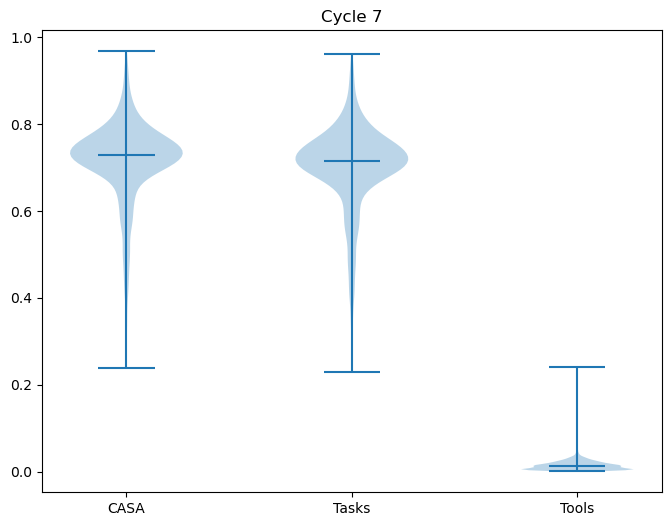

In [170]:
reload(parse_logs)
parse_logs.plot_casa_time(casa_cycle7, plot_title='Cycle 7')

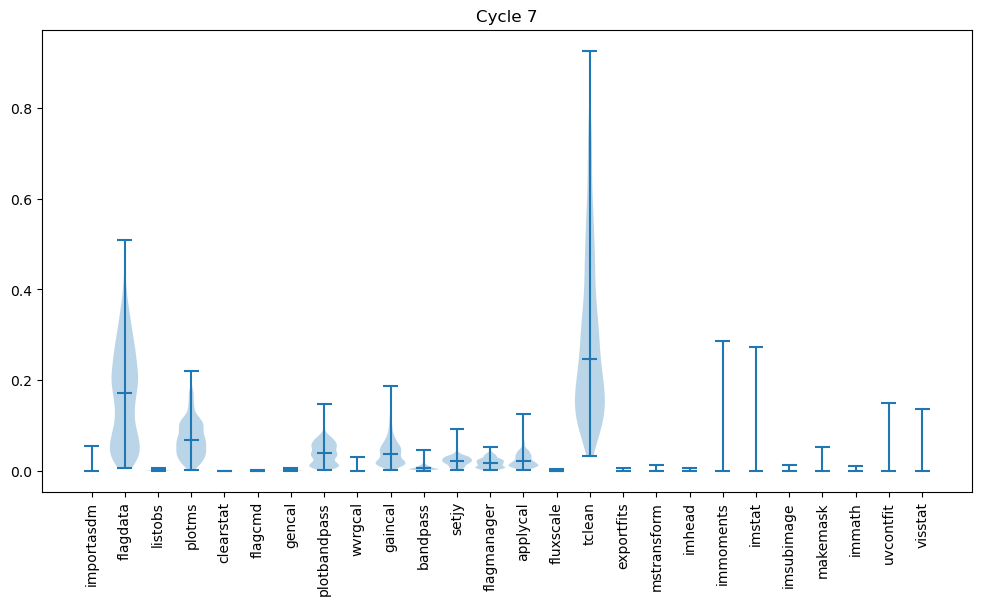

In [169]:
reload(parse_logs)
parse_logs.plot_casa_task_time(casa_cycle7,plot_title='Cycle 7')

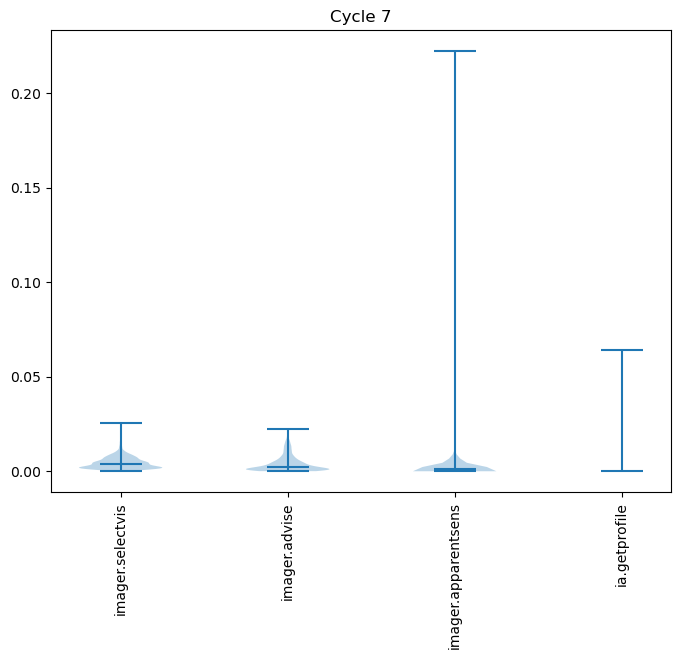

In [172]:
reload(parse_logs)
parse_logs.plot_casa_tool_time(casa_cycle7,plot_title='Cycle 7')

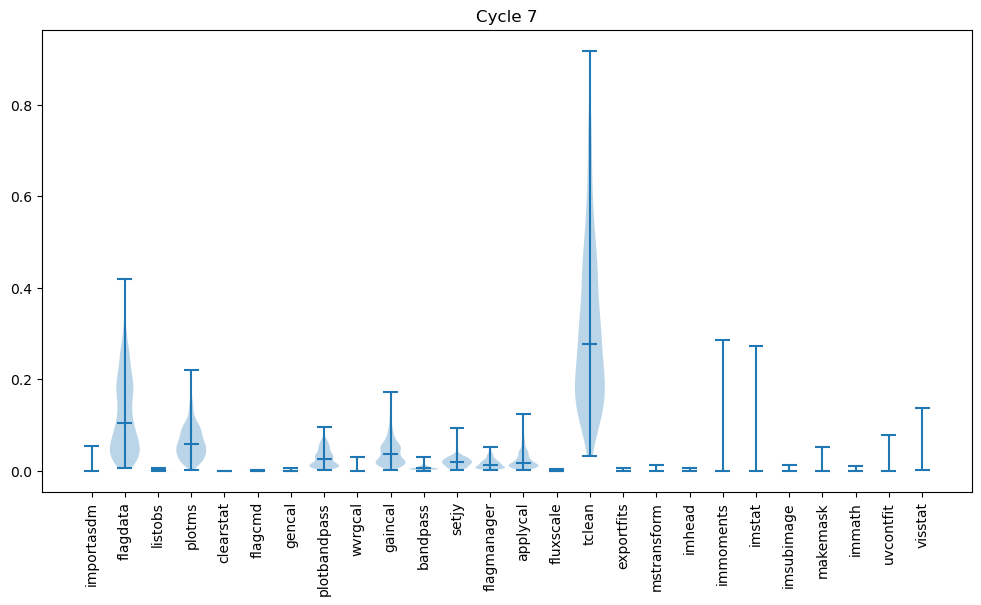

In [201]:
reload(parse_logs)
idx = casa_cycle7['casaversion'] != '5.6.1-8'
parse_logs.plot_casa_task_time(casa_cycle7[idx],plot_title='Cycle 7')

In [194]:
np.unique(casa_cycle7['casaversion'])

5.6.1-8
6.1.1.15
6.2.1.7
6.4.1.12


In [167]:
np.average(casa_cycle7['immoments']/casa_cycle7['pipetime'])

0.011092973898932344

In [71]:
casa_cycle7.columns

<TableColumns names=('casaversion','pipeStartTime','recipe','casatasks','importasdm','flagdata','listobs','plotms','clearstat','flagcmd','gencal','plotbandpass','wvrgcal','gaincal','bandpass','setjy','flagmanager','applycal','plotms_mpi','fluxscale','casatools','imager.selectvis','imager.advise','imager.apparentsens','tclean_mpi','tclean','pipeEndTime','exportfits','mstransform','imhead','immoments','imstat','imsubimage','makemask','ia.getprofile','immath','uvcontfit','pipetime','visstat')>

In [72]:
mycols_tasks = ['importasdm','flagdata','listobs','plotms','clearstat','flagcmd','gencal','plotbandpass','wvrgcal','gaincal','bandpass','setjy','flagmanager','applycal','fluxscale','tclean','exportfits','mstransform','imhead','immoments','imstat','imsubimage','makemask','immath','uvcontfit','visstat']

In [73]:
mymeans = np.mean(casa_cycle7[mycols_tasks]/casa_cycle7['pipetime'])

TypeError: unsupported operand type(s) for /: 'tuple' and 'float'

In [32]:
np.shape(data)


(4, 100)

In [34]:
type(data)

list